## Описание проекта

Интернет-магазин продаёт компьютерные игры по всему миру. Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

## Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, а именно:

  1. **EC («Early childhood»)** — «Для детей младшего возраста»
  2. **E («Everyone»)** — «Для всех»
  3. **K-A ("Kids to Adults")** — вариация категории «Для всех»
  4. **E10+ («Everyone 10 and older»)** — «Для всех от 10 лет и старше»
  5. **T («Teen»)** — «Подросткам»
  6. **M («Mature»)** — «Для взрослых 17+»
  7. **AO («Adults Only 18+»)** — «Только для взрослых»
  8. **RP («Rating Pending»)** — «Рейтинг ожидается»
  
**NB.** Данные за 2016 год могут быть неполными.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sns
import numpy as np

In [6]:
# Комментарий ревьюера
df = pd.read_csv('/content/games.csv')
#df = pd.read_csv('/datasets/games.csv')

In [7]:
df # Выведем общий вид датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.isna().mean() # Посмотрим на долю пропусков

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

**Вывод:** 
  * 1 Необходимо изменить тип данных в столбцах ` Year_of_Release`, `Critic_Score`, `User_Score`
  * 2 Изменить регист всех коллон
  * 3 Много пропусков в колонках с оценками, посмотрим что можно сделать.
  
<font size="2">([к содержанию](#0.0))</font>


## Шаг 2. Подготовим данные:

In [10]:
df.columns = map(str.lower, df.columns) # Приведем названия к нижнему регистру.

колонка `year_of_release` должна содержать целые числа а `user_score` вещественные, изменим тип колонок.

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

В столбце `user_score` есть значение **tbd** это аббревиатура которая означает to be determined - будет определен позднее. то есть для этих наблюдений оценка будет определнна позже, заменю эти поля на не тепичное значение -1 и буду учитывать это при дальнейших рассчетах.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = pd.to_numeric(df['user_score'])

Приступим к пропускам, в столбцах `name`, `year_of_release`, `genre` маленькая доля пропусков, думаю их можно просто удалить, это не повлияет сильно на данные.

In [13]:
df[df['name'].isnull()] # Пахоже на какой-то баг при сборе датафрейма

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
df.dropna(subset=['name'], inplace=True) # Колонка genre и name имеют общие пропуски.

In [15]:
df.dropna(subset=['year_of_release'], inplace=True)

Остались колонки с рейтингами и оценками критиков и пользователей, я заполню в них пропуски не типичным значением -1 так получиться оставить целиковую базу и неповлиять на результаты.

In [16]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [18]:
df['critic_score'] = df['critic_score'].astype(int)

In [19]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # Создам коллонку с общими продажами

In [20]:
df.isna().mean() # Контрольная проверка 

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
all_sales          0.0
dtype: float64

**Итог:**
  * 1 Привели название к нужному регистру.
  * 2 Заменили тип данных в толбцах.
  * 3 Обработали пропуски. 
  * 4 Добавили колонку с общими продажами.

## Шаг 3. Проведем исследовательский анализ данных 

### Посморим на то сколько игр выпускалось в разные годы.

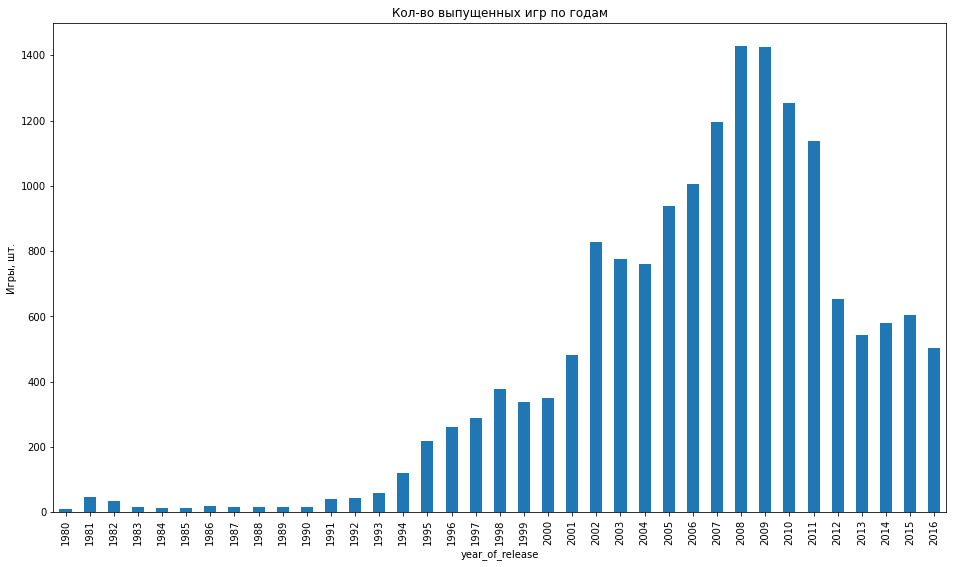

In [21]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(16,9), title='Кол-во выпущенных игр по годам', ylabel='Игры, шт.');


На графике становиться виден резкий скачок увелечения вышедших игр в 2002г, нам необходимы только актуальные данные, так что проанализируем дальше и посмотрим более подробно с какого года оставим данные.

### Срок для платформ

Посмотрим как менялись продажи по платформам и дадим ответ на вопрос:
  * **За какой характерный срок появляются новые и исчезают старые платформы?**

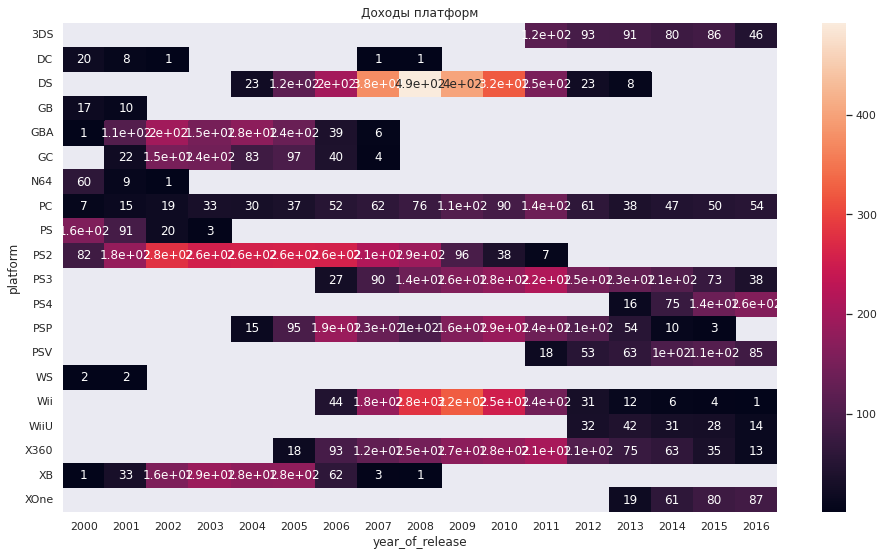

In [69]:
test = df.query('year_of_release > 1999').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
sns.set(rc = {'figure.figsize':(16,9)});
plt.title('Доходы платформ')
sns.heatmap(test,annot = True);

По распределению можно сказать что примерно в 2006 году сменилось поколение игровых платформ и на замену старым приходят новые плтаформы, примерный срок за который происходит смена где-то 8-9 лет.

Для дальнейшего анализа я отброшу данные позже 2006 года.

In [23]:
actual_df = df.query('year_of_release > 2011')

### Топ платформ

Выберем платформы с наибольшим колличеством продаж.

In [24]:
platform_top_sales = actual_df.groupby('platform')['all_sales'].sum().reset_index().sort_values(by='all_sales',ascending=False)
platform_top_sales

,platform,all_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


In [25]:
top_platforms = platform_top_sales['platform'].to_list()
top_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

In [26]:
game_stat_top = actual_df.query('platform in @top_platforms')
game_stat_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Еще раз посмотрим на распределение нуже по новым данным.

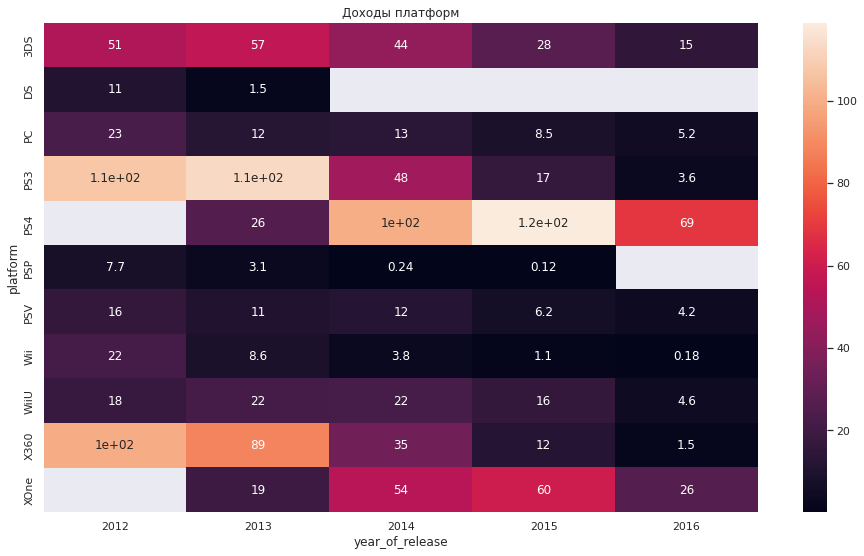

In [70]:
d = game_stat_top.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
sns.set(rc = {'figure.figsize':(16,9)});
plt.title('Доходы платформ')
sns.heatmap(d,annot = True);

Посмотрев на даныне можно сказать что пик выручки у большенства приходит на 2014 год. Потенциально выгодной платформой можно считать 2 платформы PS4 и XOne. PS4 спустя год после выхода на рынок показавает хорошие результаты, ХOne отстает от PS4 но среди конкурентов все равно показывает не плохой доход.

### Анализ глобальных продаж

 *  **Построим график ящик с усами по глобальным продажам игр в разбивке по платформам**

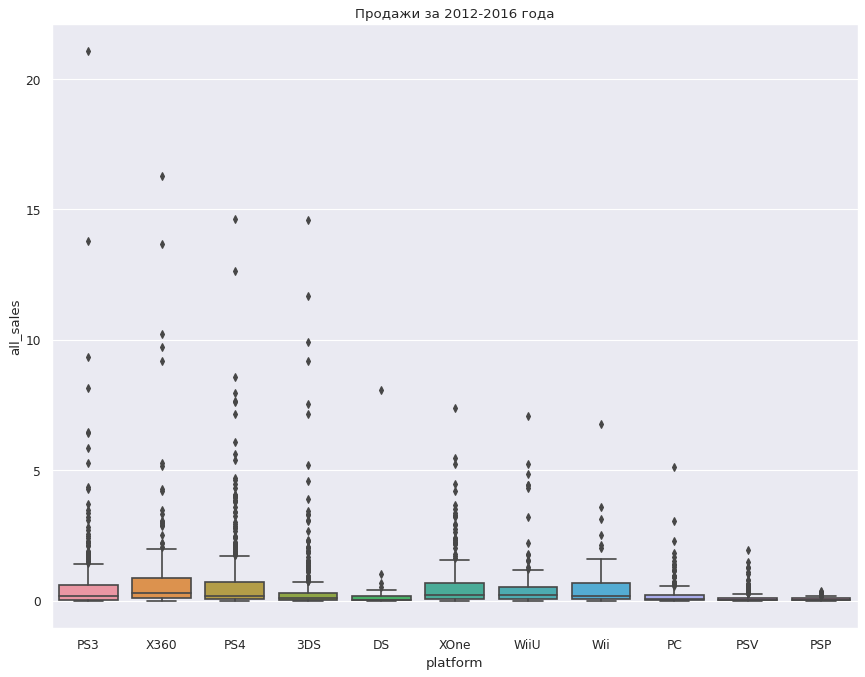

In [28]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='all_sales', data=game_stat_top, notch=False);
plt.title('Продажи за 2012-2016 года');

Очень большие выбросы, адеватные значение находяться приблезительно в 1.5млн копий, посмотрмим на них.

In [29]:
stat = game_stat_top.query('all_sales < 1.5') 

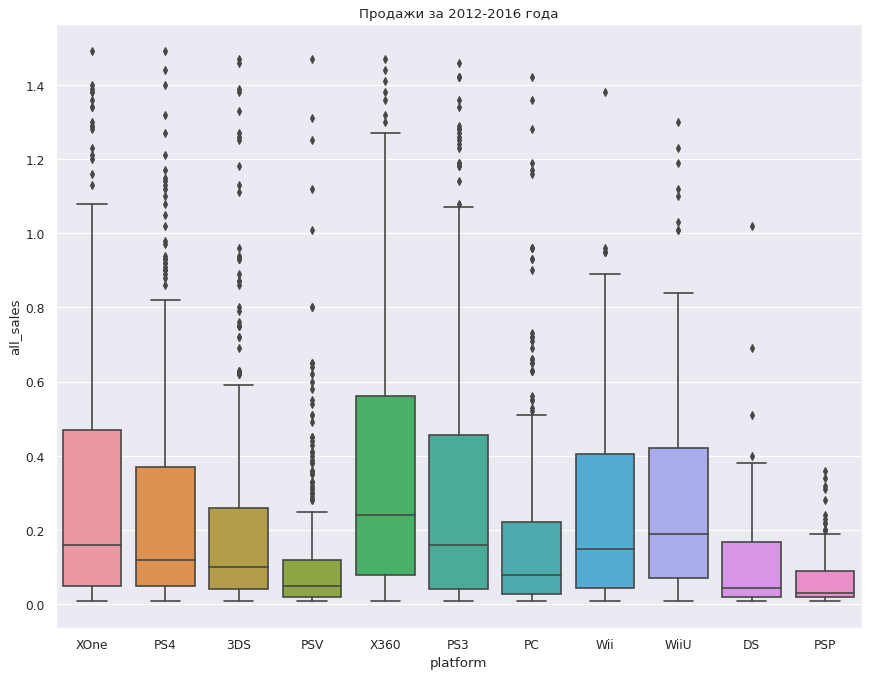

In [30]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='all_sales', data=stat, notch=False, );
plt.title('Продажи за 2012-2016 года');

Посмотрим на средние значение продаж по годам за выбранный период.

Text(0, 0.5, '')

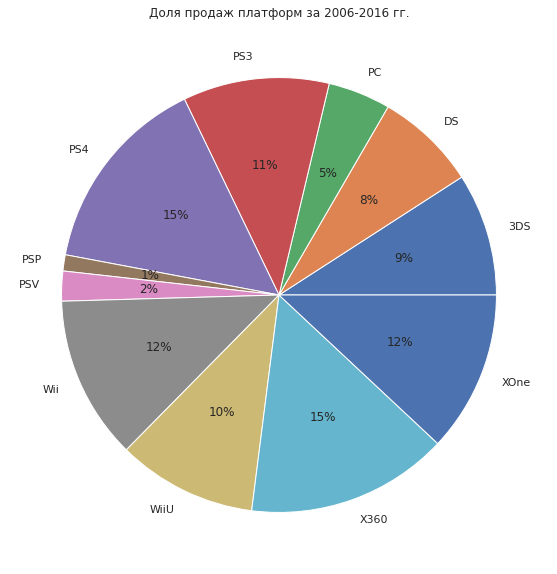

In [31]:
pie = game_stat_top.groupby('platform')['all_sales'].mean()
pie.plot(kind='pie', figsize=(10,10) , autopct='%1.0f%%', title='Доля продаж платформ за 2006-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')

За выбранный период есть несколько лидеров по продажм - **PS4, X360, PS3, Wii, XOne**

### Влияние оценки на продажи

Посморим на влияние отзывов на прожаи в нутри нескольких платформ, представляющие разных потребителей. Построим диаграмму рассеяния и посчитаем кореляцию между отзывами.

Выделим отдельные таблицы для разных платформ.

In [32]:
df_ps3 = game_stat_top.query('platform == "PS3" and user_score != -1 and critic_score != -1')# Для  PS3 
df_x360 = game_stat_top.query('platform == "X360" and user_score != -1 and critic_score != -1') # Для Xbox 360
df_wiiu = game_stat_top.query('platform == "WiiU" and user_score != -1 and critic_score != -1') # Для WiiU
df_pс = game_stat_top.query('platform == "PC" and user_score != -1 and critic_score != -1') # Для PC

#### Пользователи

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

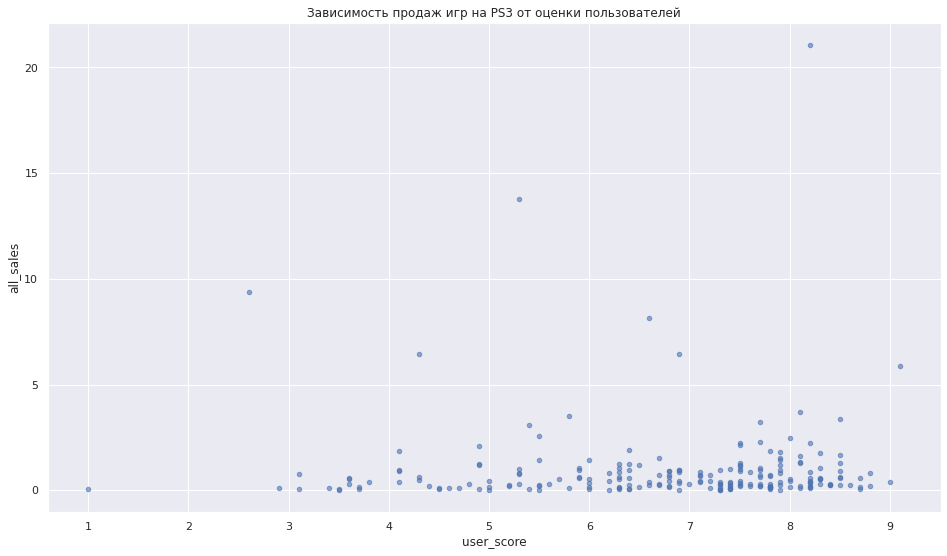

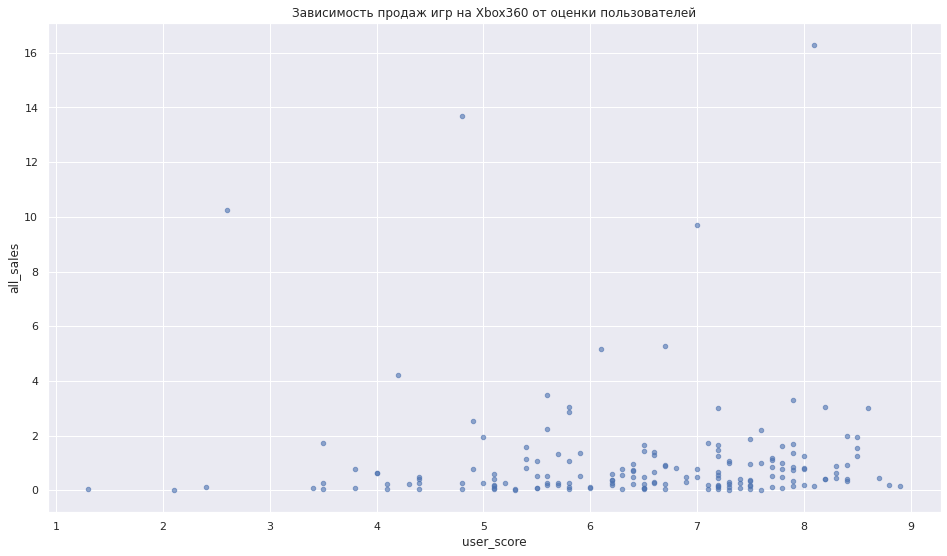

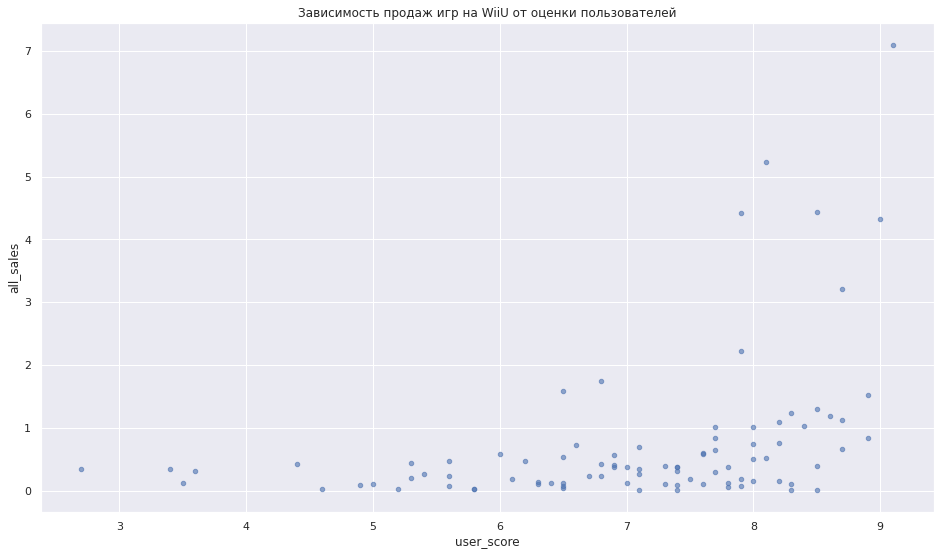

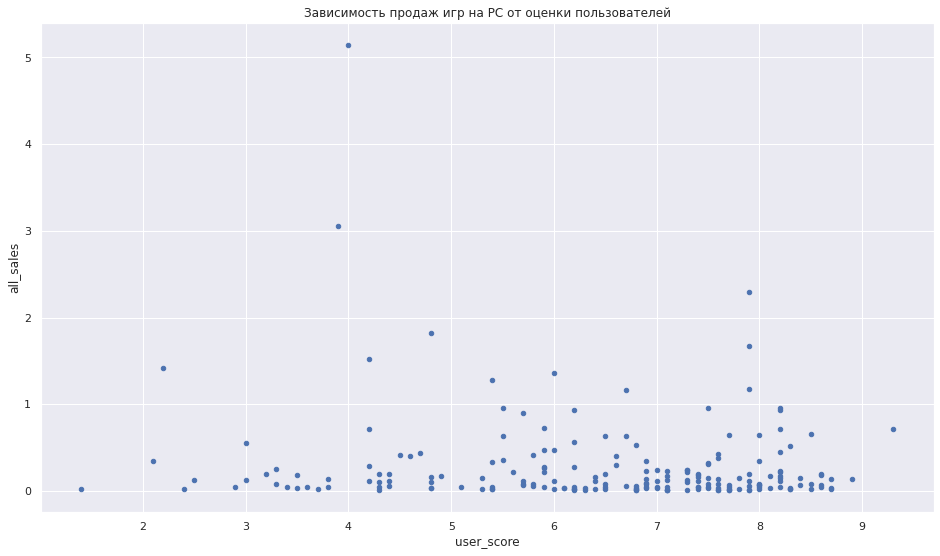

In [33]:
df_ps3.plot(kind ='scatter',y='all_sales', x='user_score', title= 'Зависимость продаж игр на PS3 от оценки пользователей', alpha=0.6);
df_x360.plot(kind ='scatter',y='all_sales', x='user_score', title= 'Зависимость продаж игр на Xbox360 от оценки пользователей', alpha=0.6);
df_wiiu.plot(kind ='scatter',y='all_sales', x='user_score', title= 'Зависимость продаж игр на WiiU от оценки пользователей', alpha=0.6);
df_pс.plot(kind ='scatter',y='all_sales', x='user_score', title= 'Зависимость продаж игр на PC от оценки пользователей', alpha=1);
ax= plt.gca()

In [34]:
print('Корреляция для PS3 равна:',df_ps3['all_sales'].corr(df_ps3['user_score']))
print('Корреляция для XBox360 равна:',df_x360['all_sales'].corr(df_x360['user_score']))
print('Корреляция для WiiU равна:',df_wiiu['all_sales'].corr(df_wiiu['user_score']))
print('Корреляция для PC равна:',df_pс['all_sales'].corr(df_pс['user_score']))

Корреляция для PS3 равна: 0.0032274054930356904
Корреляция для XBox360 равна: -0.0020140394826897853
Корреляция для WiiU равна: 0.3918479505297129
Корреляция для PC равна: -0.1369335107338787


### Критики

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

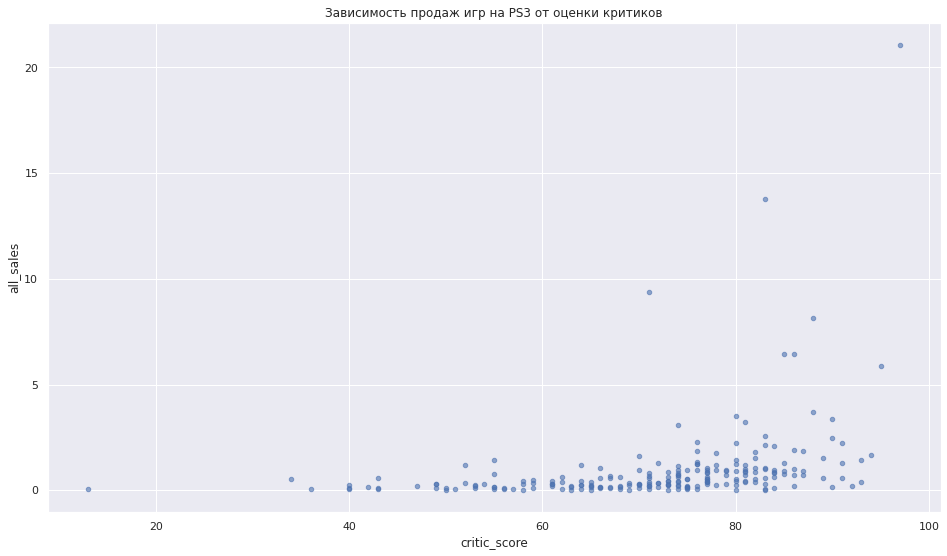

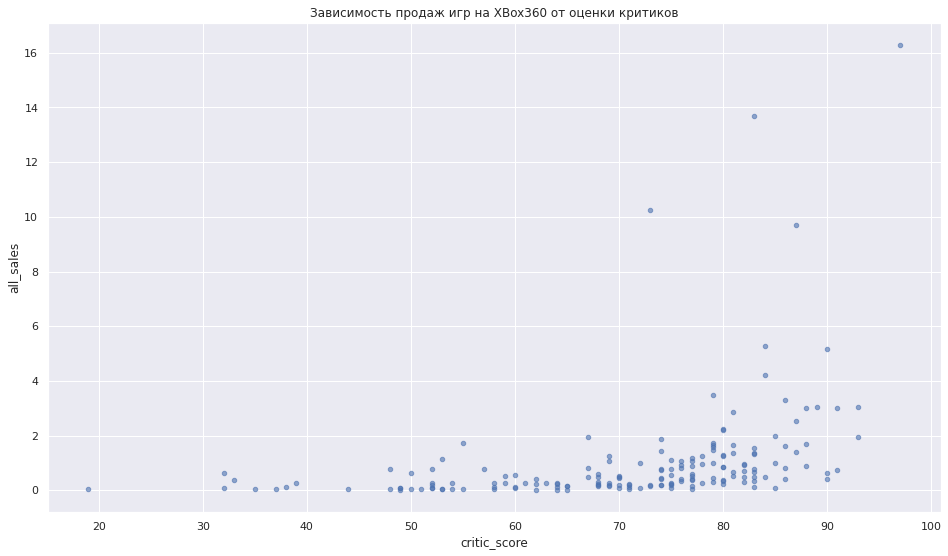

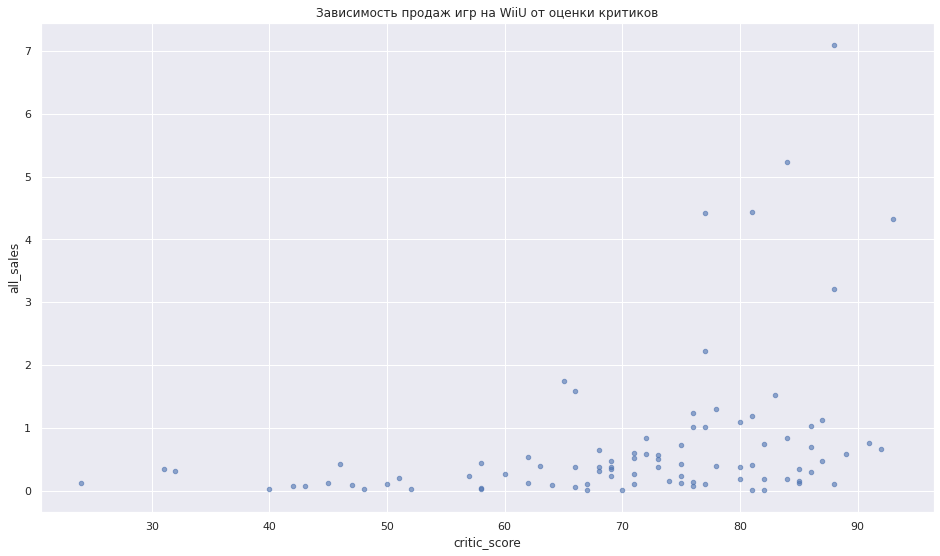

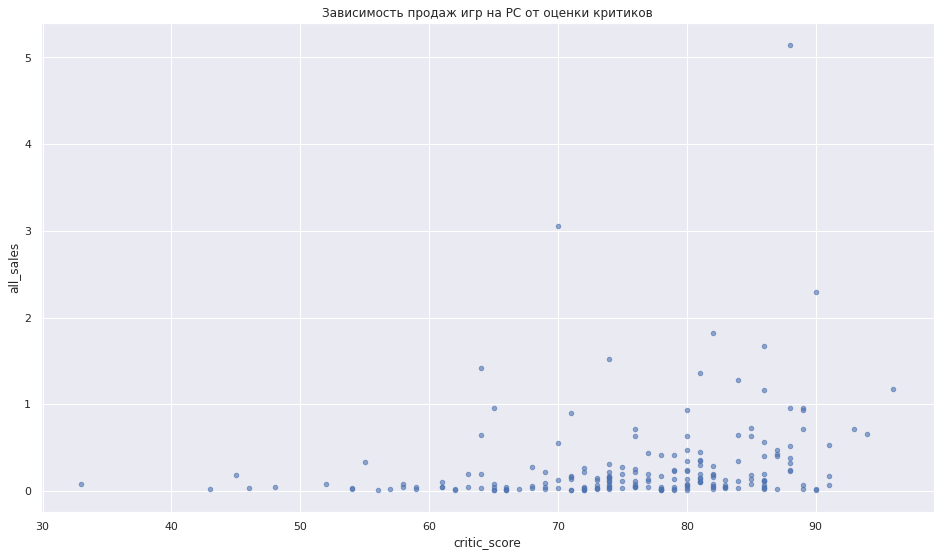

In [35]:
df_ps3.plot(kind ='scatter',y='all_sales', x='critic_score', title= 'Зависимость продаж игр на PS3 от оценки критиков', alpha=0.6);
df_x360.plot(kind ='scatter',y='all_sales', x='critic_score', title= 'Зависимость продаж игр на XBox360 от оценки критиков', alpha=0.6);
df_wiiu.plot(kind ='scatter',y='all_sales', x='critic_score', title= 'Зависимость продаж игр на WiiU от оценки критиков', alpha=0.6);
df_pс.plot(kind ='scatter',y='all_sales', x='critic_score', title= 'Зависимость продаж игр на PC от оценки критиков', alpha=0.6);
ax= plt.gca()

In [36]:
print('Корреляция для PS3 равна:',df_ps3['all_sales'].corr(df_ps3['critic_score']))
print('Корреляция для XBox360 равна:',df_x360['all_sales'].corr(df_x360['critic_score']))
print('Корреляция для WiiU равна:',df_wiiu['all_sales'].corr(df_wiiu['critic_score']))
print('Корреляция для PC равна:',df_pс['all_sales'].corr(df_pс['critic_score']))

Корреляция для PS3 равна: 0.3310566175801407
Корреляция для XBox360 равна: 0.36057348885073365
Корреляция для WiiU равна: 0.35088242248864304
Корреляция для PC равна: 0.2360077361879236


Становиться заметно что на продажи в большей степени влияют оценки критиков. При оценке больше 70, продажи стремительно начинают рости.

### Все платформы

Посмотри на графики и корреляцию для всех платформ.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


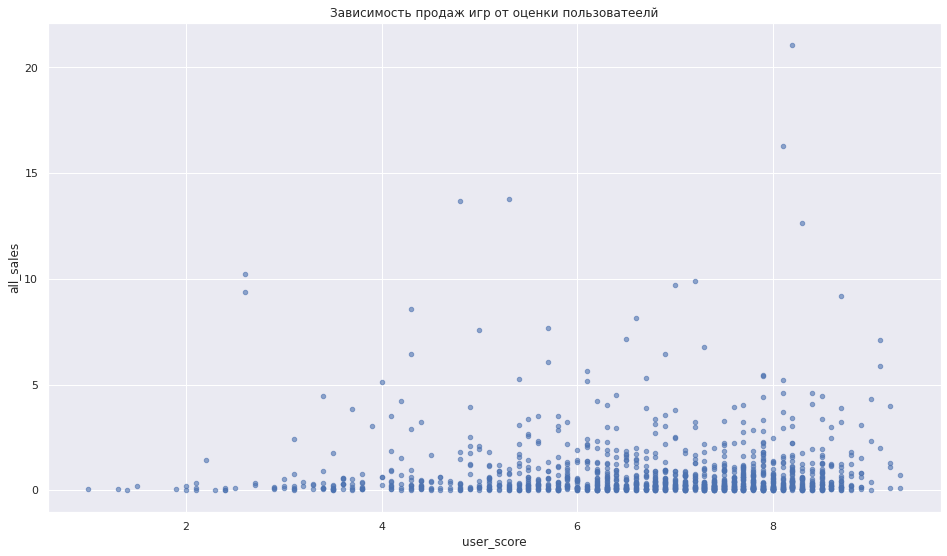

In [37]:
df_filtred = game_stat_top.query('critic_score != -1 and user_score != -1')
df_filtred.plot(kind ='scatter',y='all_sales', x='user_score', title= 'Зависимость продаж игр от оценки пользоватеелй', alpha=0.6);

In [38]:
df_filtred['all_sales'].corr(df_filtred['user_score'])

0.0005966665040503057

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


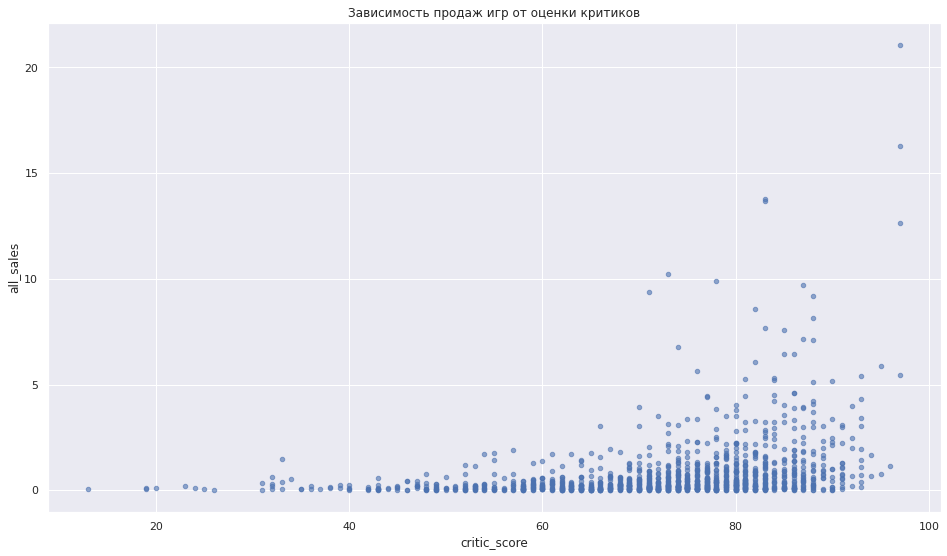

In [39]:
df_filtred.plot(kind ='scatter',y='all_sales', x='critic_score', title= 'Зависимость продаж игр от оценки критиков', alpha=0.6)

In [40]:
df_filtred['all_sales'].corr(df_filtred['critic_score'])

0.30651579412925023

При взгляде на два последних графика уже не так явно становиться видна разница влияние оценки критиков или пользователй на продажи, но на цифрах она все еще присутсвует.

## Распределение по жанрам

* Посмотрим на общее распределение игр по жанрам.

In [41]:
game_stat_top.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by='all_sales', ascending=False)

,all_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


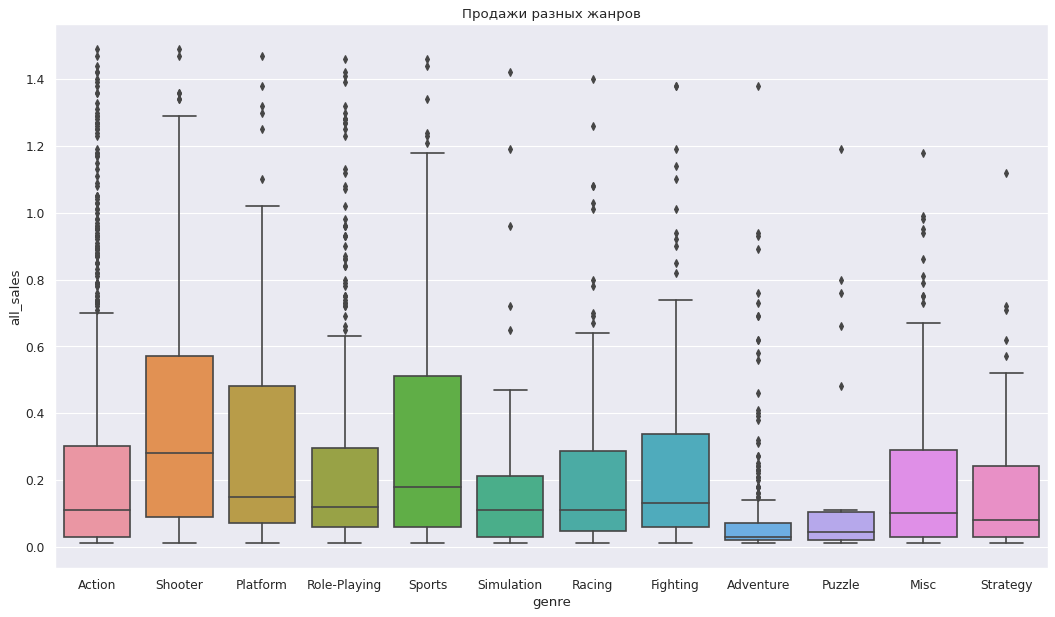

In [42]:
plt.figure(figsize=(16,9), dpi= 80)
sns.boxplot(x='genre', y='all_sales', data=stat, notch=False, );
plt.title('Продажи разных жанров');

С большим отрывом по продажам лидируют игры жанра **Action**, за ними идут жанры **Sports** и **Shooter**. Самые низкие сборы у жанров **Adventure**, **Puzzle** и **Strategy**.

**Вывод:** 


Провели исследовательский анализ данных, выделили срез данных за 2012-2016 год. Нашли 10 самых прибыльных платформ.

* В промежутке который был выделен пик всех продаж по большенству платформ приходиться на 2014 год.
* Учитывая что мы распологаем дата сетом за неполный 2016 год то потенциальной платформой можно назвать PS4 и XOne
* На примере плтформ `PS3`, `XBox360`, `WiiU`, `PC` рассмотрели корреляцию **оценка критика/выручка** и **оценка пользователя/выручка** и пришли к выводу, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.
* Больше всего выручка у платформы при оценке критиков 70 и выше.

* Самыми прибыльными оказались жанры  `Shooter`, `Sports` и `Platform` .

## Шаг 4: Составим портрет пользователя каждого региона.



Определим для пользователя каждого региона (NA, EU, JP):
* самые популярные платформы (топ-5)
* самые популярные жанры (топ-5)
* влияние рейтинга ESRB на продажи в регионе

### NA

In [43]:
( game_stat_top
 .groupby('platform')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales',ascending=False)
 .head(5)
 )

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [45]:
( game_stat_top
 .groupby('genre')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales',ascending=False)
 .head(5)
 )

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [46]:
(game_stat_top
 .query('rating != "-1"')
 .groupby('rating')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

,rating,na_sales
3,M,231.57
1,E,114.37
0,-1,103.31
2,E10+,75.70
4,T,66.02


В Северной Америке лидируют платформы **1- X360, 2- Wii, 3- PS3**

Самыми популярными жанрами являются **1- Action, 2- Sports, 3- Shooter**

С большим отрывом лидирует рейтинг **E** а следои уже за ним идут **М** и **Т**


### EU

In [47]:
( game_stat_top
 .groupby('platform')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales',ascending=False)
 .head(5)
 )

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [48]:
( game_stat_top
 .groupby('genre')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales',ascending=False)
 .head(5)
 )

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [49]:
(game_stat_top
 .query('rating != "-1"')
 .groupby('rating')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

,rating,eu_sales
3,M,193.96
1,E,113.03
0,-1,91.50
2,E10+,55.37
4,T,52.96


В Европе лидирующими платформами являются **1- PS3, 2- X360, 3- Wii** тот же топ консолей что и в Северной Америке но в Европе **PS3** находиться на первом месте по продажам.

Самыми популярными жанрами являются **1- Action, 2- Sports, 3- Shooter**

С небольшим преимуществом на первом месте рейтинг **Е** далее за ним идут **М** и **Т**

Жанры и рейтинги преобладающие в Европе теже что и в Северной Америке.







### JP

In [50]:
( game_stat_top
 .groupby('platform')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales',ascending=False)
 .head(5)
 )

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [51]:
( game_stat_top
 .groupby('genre')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales',ascending=False)
 .head(5)
 )

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


In [52]:
(game_stat_top
 .query('rating != "-1"')
 .groupby('rating')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

,rating,jp_sales
0,-1,108.84
1,E,28.33
4,T,26.02
3,M,21.20
2,E10+,8.19


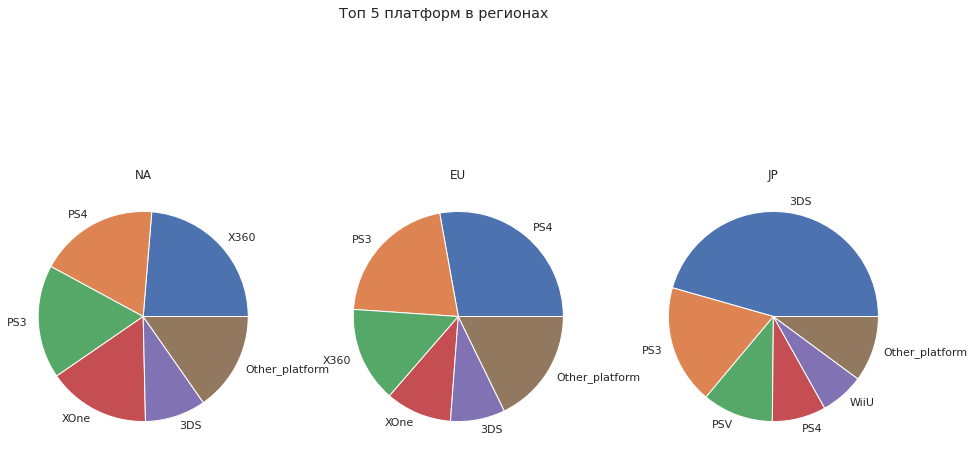

In [53]:
#Задаем список регионов
countries = game_stat_top.columns[4:7]
# Начертим круговую дианрамму для всех регионов
fig, axs = plt.subplots(1,3,figsize=(16,9))
fig.suptitle('Топ 5 платформ в регионах')
for i in range(3):
    # Выберем топ 5 платформ
    df_i = (game_stat_top.groupby('platform')[countries[i]].sum().
           reset_index()
           .sort_values(countries[i], ascending=False, ignore_index=True)
           .head(5))
    #Занесем все остальные продажи в Other_platform
    df_i = df_i.append({'platform':'Other_platform', countries[i]:game_stat_top[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index=True)
    axs[i].pie(df_i[countries[i]], labels=df_i['platform'])
    # Зададим название региона
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())

plt.show()

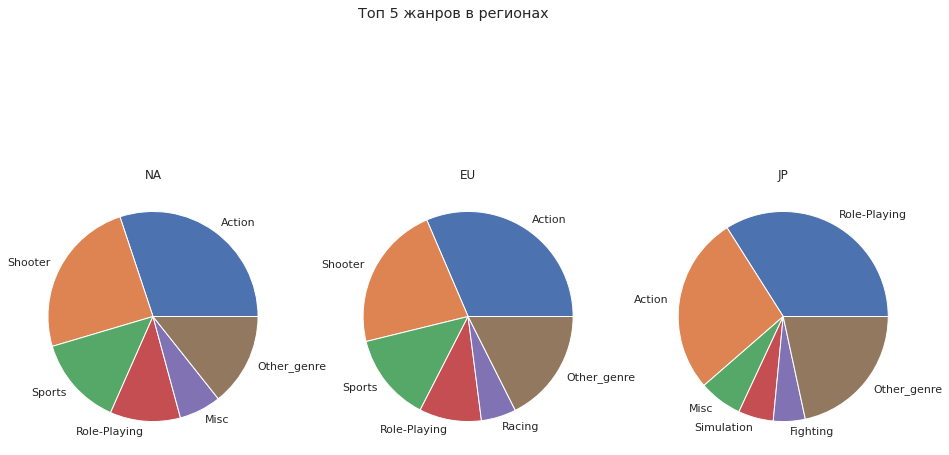

In [54]:
#Задаем список регионов
countries = game_stat_top.columns[4:7]
# Начертим круговую дианрамму для всех регионов
fig, axs = plt.subplots(1,3,figsize=(16,9))
fig.suptitle('Топ 5 жанров в регионах')
for i in range(3):
    # Выберем топ 5 жанров
    df_i = (game_stat_top.groupby('genre')[countries[i]].sum().
           reset_index()
           .sort_values(countries[i], ascending=False, ignore_index=True)
           .head(5))
    #Занесем все остальные продажи в Other_gnre
    df_i = df_i.append({'genre':'Other_genre', countries[i]:game_stat_top[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index=True)
    axs[i].pie(df_i[countries[i]], labels=df_i['genre'])
    # Зададим название региона
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())

plt.show()


Самые популярными платформами являются **1- DS 2- 3DS 3- PS3**

В тройке лидиров по жанрам находяться **1- Role-Playing, 2- Action, 3- Misc**

И все теже категории рейтинга на первых местах **Е, Т, М**

Японский регион оказался очень индивидульным по предпочтениям, но в этом регионе в разы меньше прождажи по сравнению с Северной Америкой или Европой.

### Другие регионы

In [55]:
( game_stat_top
 .groupby('platform')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales',ascending=False)
 .head(7)
 )

,platform,other_sales
4,PS4,48.35
3,PS3,43.26
9,X360,20.40
10,XOne,14.27
0,3DS,8.87
8,WiiU,5.95
6,PSV,5.80


In [56]:
( game_stat_top
 .groupby('genre')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales',ascending=False)
 .head(7)
 )

,genre,other_sales
0,Action,51.14
8,Shooter,37.26
10,Sports,22.44
7,Role-Playing,14.83
3,Misc,7.67
6,Racing,6.49
4,Platform,5.58


In [57]:
(game_stat_top
 .query('rating != "-1"')
 .groupby('rating')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(7)
)

,rating,other_sales
3,M,63.38
1,E,31.44
0,-1,27.17
4,T,17.94
2,E10+,16.23


Самые популярные платформы: **1- PS3, 2- X360, 3- Wii**

Самые продаваемые жанры: **1- Action 2- Sports	3- Shooter**	

Топ рейтингов **1- Е, 2- М, 3- Т**

**Вывод:**

* Составили портрет 4х регионов **NA, EU, JP** и **Другие регионы** 
* Посмотрели в каких регионах какие преобладают платформы, жанры и рейтинги.
* Япония оказалось самым индивидуальным регионом в плане потребления платформ и жанров игр, хоть и не с самыми большими продажами, к этому региону нужен особый подход в плане рекламных компаний.
* Больше всего игр потребляют два региона **NA** и **EU**
* В 3х из чертырех регионах преобладающими жанрами являються **Actions, Sports, Shooter**
* Практически во всех регионах предпочитают одни и теже рейтинги игр.

## Шаг 5: Проверим гипотезы:

### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

* H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны
* H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [58]:
# Критический уровень статестической значимости.
alpha= .05

In [59]:
xone = game_stat_top.query('platform == "XOne" and user_score != -1')
pc = game_stat_top.query('platform == "PC" and user_score != -1')

In [60]:
# Комментарий ревьюера
xone.user_score.min(), pc.user_score.min()

(1.6, 1.4)

In [61]:
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', round(xone['user_score'].mean(),2))
print('Cредний пользовательский рейтинг платформы PC -', round(pc['user_score'].mean(),2))

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.52
Cредний пользовательский рейтинг платформы PC - 6.43


### 2. Средние пользовательские рейтинги жанров Action и Sports разные.



* H₀ - средние пользовательские рейтинги жанров Action и Sports равны
* H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [62]:
action =  game_stat_top.query('genre == "Action" and user_score != -1')
sports = game_stat_top.query('genre == "Sports" and user_score != -1')

In [63]:
# Комментарий ревьюера
action.user_score.min(), sports.user_score.min()

(1.6, 0.2)

In [64]:
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', round(xone['user_score'].mean(),2))
print('Cредний пользовательский рейтинг платформы PC -', round(pc['user_score'].mean(),2))

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.52
Cредний пользовательский рейтинг платформы PC - 6.43


**Вывод:** 
Проверили 2 гипотезы и обе отвергнуть не удалось.
* средние пользовательские рейтинги платформ Xbox One и PC не равны
* средние пользовательские рейтинги жанров Action и Sports не равны


Иллюстрация средних оценок пользователей по платформам и жанрам 

In [65]:
user_score_pltf = game_stat_top.groupby('platform')['user_score'].mean()
user_score_pltf

platform
3DS     1.312626
DS     -0.225806
PC      5.121200
PS3     3.324138
PS4     4.079847
PSP    -0.839306
PSV     1.660097
Wii     1.229630
WiiU    4.376871
X360    4.811301
XOne    4.542105
Name: user_score, dtype: float64

In [66]:
user_score_pltf = game_stat_top.groupby('genre')['user_score'].mean()
user_score_pltf

genre
Action          2.969447
Adventure       1.018543
Fighting        4.070642
Misc            1.770312
Platform        5.061176
Puzzle          1.775000
Racing          4.347826
Role-Playing    2.816757
Shooter         5.170213
Simulation      2.943750
Sports          3.697388
Strategy        2.657746
Name: user_score, dtype: float64

## Шаг 6. Общий вывод.

Входе работы мы проделали:

1. Посмотрели на общую базу данных выявили ее проблемы. 
2. Подготовили данные к анализу, изменили регист в названиях колонок, изменили тип данных в столбцах `year_of_release` и `user_score`, расшифровали аббревиатуру **tbd**, удалили не нужные строки, добавли колонку с общими продажами.
3. Провели исследовательских анализ данных: посмотрели на колличество выпущенных игр по годам, выделили срез данных с 2012 по 2016 год, нашли 10 самых прибыльных платформ, выделили  пик всех продаж по большенству платформ приходящийся на 2014 год, на примере платформы **PS3, Xbox360, WiiU и PC** рассмотрели корреляцию *оценка критика/выручка** и **оценка пользователя/выручка**
4. Составили портрет пользователя в каждом регионе **NA, EU, JP** и **Другие регионы**, посмотрели в каких регионах какие преобладают платформы, жанры и рейтинги, выделили особенности предпочтения каждого региона, самым индивидуальным оказался **JP**, другие регионы очень схожы в предпочтении платформы и жанров.
5. Проверили 2 гипотезы средние пользовательские рейтинги платформ Xbox One и PC разные, средние пользовательские рейтинги жанров Action и Sports разные .


**И так отвечаем на вопрос касаемо рекламной компании, из ходя из данных которые были предоствленны и проанализированы, можно выделить несколько потенциально выгодных жанровых направлений `Shooter`, `Sports` и `Platform`, это топ 3 лидирующие жанра при учете того что данные за неполный 2016г самой потенцеальной платформой можно назвать `PS4`  так как она спусня короткий период времени начала показывать хорошие продажи и `XOne` хоть и с отставанием но это слейдующий кандидат после PS4, при планировании рекламной компании необходимо учитывать особенности каждого региона, так на пример регион `JP` по итогу анализа оказлся самым индивидуальным в плане предпочтений платформ и жанров.** 





